# Linear Regression with One Variable


In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper parameters
learning_rate = 1
training_epochs = 400
display_step = 20

## Dataset

Our dataset a wire resistance table from a chip for 20nm process node. 
It is a 2D array of wire-length, wire-width, temperature and wire-resistance.
We'll use wire length and wire resistance as our dataset for linear regression example.


|Wire-length | Wire-width  | Temperature | Resistance
|------------|-------------|-------------|-------------
|(meters)    | (meters)    | (degree C)  | (Ohm)
|3.806e-06   | 1.088e-07   | 79.0494     | 52.897 
|4.307e-06   | 7.517e-08   | 56.2845     | 83.904 
|4.158e-06   | 1.135e-07   | 27.0643     | 52.517 
|5.416e-06   | 8.939e-08   | 42.0784     | 85.435 
|6.274e-06   | 9.090e-08   | 55.5829     | 110.85 
|8.215e-06   | 1.199e-07   | 97.4032     | 119.45
|6.437e-06   | 6.653e-08   | 75.0783     | 148.11 
|2.823e-06   | 1.028e-07   | 2.48765     | 36.138 
|2.015e-06   | 1.293e-07   | 63.5732     | 22.955 
|6.346e-06   | 6.420e-08   | 77.0031     | 145.52 
|5.008e-06   | 1.047e-07   | 105.656     | 79.024 



In [3]:
#Load dataset
datafile = os.path.join('..','data','res.tbl.gz')
dataset = np.loadtxt(datafile, dtype=np.float32, ndmin=2)
# reduce the dataset for quick experiments
#dataset = dataset[0:100,:]

## Normalization
Since our length values are very small (in microns) and resistance values range from tens to hundreds, it is **very important** normalize the dataset right after loading.

In [4]:
# normalize the dataset between 0 and 1.
data_min = np.min(dataset, axis=0)
data_max = np.max(dataset, axis=0)

def normalize(d, min, max):
    return (d-min)/(max-min)

def denormalize(d, min, max):
    return ((max-min)*d) + min

dataset = normalize(dataset, data_min, data_max)

## Divide the dataset
into training dataset and validation dataset

In [5]:
# training dataset percentage is 80%
def divide_dataset(dataset):
    train_pct = 0.8; 
    # divide dataset into training and validation set
    train_index = int(dataset.shape[0]*train_pct)
    t_X = dataset[:train_index,0]
    t_Y = dataset[:train_index,3]
    v_X = dataset[train_index:,0]
    v_Y = dataset[train_index:,3]
    
    return t_X, t_Y, v_X, v_Y

train_X, train_Y, valid_X, valid_Y = divide_dataset(dataset)
n_samples = train_X.shape[0]

## Declare Graph Variables

Place to declare plave holders and variables for compute graph

In [6]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(0.5, name="weight")
b = tf.Variable(0.0, name="bias")

## Compute Graph
Construct a linear model

In [7]:
predicted = W*X + b

## Cost function and Optimizer

In [8]:
# Mean squared error
cost = tf.reduce_sum((predicted-Y)*(predicted-Y))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Train the Model

In [9]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0020 cost= 0.002541965 W= 0.468754 b= -0.0113639
Epoch: 0040 cost= 0.002526478 W= 0.452964 b= -0.00373077
Epoch: 0060 cost= 0.002517623 W= 0.441025 b= 0.00204031
Epoch: 0080 cost= 0.002512566 W= 0.431998 b= 0.00640286
Epoch: 0100 cost= 0.002509677 W= 0.425187 b= 0.00969707
Epoch: 0120 cost= 0.002508026 W= 0.420031 b= 0.0121882
Epoch: 0140 cost= 0.002507078 W= 0.41613 b= 0.0140746
Epoch: 0160 cost= 0.002506538 W= 0.413187 b= 0.0154966
Epoch: 0180 cost= 0.002506229 W= 0.410947 b= 0.0165793
Epoch: 0200 cost= 0.002506050 W= 0.409257 b= 0.0173965
Epoch: 0220 cost= 0.002505952 W= 0.408008 b= 0.0180008
Epoch: 0240 cost= 0.002505894 W= 0.407046 b= 0.0184654
Epoch: 0260 cost= 0.002505861 W= 0.406328 b= 0.0188125
Epoch: 0280 cost= 0.002505844 W= 0.405774 b= 0.0190802
Epoch: 0300 cost= 0.002505832 W= 0.405351 b= 0.0192843
Epoch: 0320 cost= 0.002505825 W= 0.405028 b= 0.0194407
Epoch: 0340 cost= 0.002505823 W= 0.404796 b= 0.019553
Epoch: 0360 cost= 0.002505821 W= 0.404628 b= 0.0196344
Epoch:

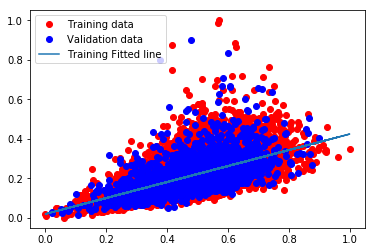

In [10]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print( "Optimization Finished!" )
    
    # Find cost on training and validation dataset.
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost (mean sq. error) =",training_cost, "W=", sess.run(W), "b=", sess.run(b))
    validation_cost = sess.run(cost, feed_dict={X: valid_X, Y: valid_Y})
    print ("Validation cost (mean sq. error) =",validation_cost, '\n')


    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Training data')
    plt.plot(valid_X, valid_Y, 'bo', label='Validation data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Training Fitted line')
    plt.legend()
    plt.show()